In [488]:
%run ../settings.py
POST_SETTINGS = {
        "image": "img/information.jpg",
        "title": "Introduction to Information Theory",
        "description": "Defining Knowledge, Information, and Entropy",
        "category": "article",
        "tags": ["Information Theory", "Tutorial"]
    }
    

# <ins>Introduction</ins>
> *"If a tree falls in the forest and no one is around to hear it, does it make a sound?"*

What does it mean to know something? Most likely, you are reading this article because you assume it contains some sort of interesting knowledge, 
Usually when we think of "knowledge" we think of truth, fact or "information."
An interesting place to start defining knowledge is the observation that if you knew the entire content of this article, ahead of time, then you woudn't gain any knowledge by reading it. 
In other words, if I tell you to read a book, but you already know all of the events in the plot, then the "information" you gain by reading it again would be virtually zero.

<br>

Let's extend this idea further: if a tree falls in a forest, how do you know that this event actually happened? \
One way to answer this question is to look at the tree as an "entity" that communicates information to you when it falls.\
If you're standing right next to the tree, then you know it fell when you physically see it falling... the *knowledge* is communicated by all the light scattering off and into your eyes, the same way the knowledge contained in 

### The Observer Effect:
The falling tree creates various physical signals: sound waves, vibrations in the ground, visual movement, displaced air molecules, etc.
Each of these signals carries potential information about the event.
For this information to be "known," it must be received and processed by another entity.
If no conscious observer is present, the physical phenomena still occur - sound waves propagate through the air, disturbing molecules. However, the information transfer that constitutes knowledge acquisition doesn't complete its journey. The signals exist, but they aren't percieved and decoded into meaningful information by a receiver. 
This brings us to an important distinction between physical phenomena and knowledge. 
Physical phenomena exist independently of observation, but knowledge necessarily involves a perceiving entity.

<br>

When we ask if a falling tree "makes a sound," we're actually asking two distinct questions:

* Do compression waves propagate through the air when a tree falls? (A physics question)
* Is the information contained in those waves received, processed, and converted into knowledge? (An epistemological question)

The answer to the first is clearly "yes" - the physical processes occur regardless of observation. The answer to the second depends entirely on the presence of a receiver capable of transforming those signals into knowledge. This distinction highlights the fundamental nature of information: it represents the measurable transfer of knowledge from one entity to another.

><q>A basic idea in communication theory is that information can be treated very much like a physical quantity such as mass or energy</q> <cite>Claude Shannon</cite>

<br>

To formalize this idea, we define information as a measure of knowledge transfer from an originating source to a recipient that previously lacked that knowledge. This transfer occurs when a signal is not only generated but also received and interpreted.

<hr>

### Defining information $\I(*)$:
Let us define the information content of an event using the function $\I$, which assigns a value based on the probability of an event occurring:
>$\I(P(X = x)) = f(P(X=x))$, for some function $f(*)$ 


We expect $\I$ to have the following properties:
<div className="definition-properties">

$\I : [0,1] \rightarrow [0, \inf)$
* **An event thats 100% probable, yields no new information.** If we're completely certain of a specific outcome of some event,\
 then we already hold that information and thus measuring the information content of this event gives us a value of 0.
* **The less probable an outcome of an event, the more surprising it is and the more information it yields.**  An outcome with 0% probability, has an information measure that approaches infinity, as we just observed something we believe to be impossible.
* **Information is always positive.** If you think about it, The idea of "negative information" makes no sense. You can't unsurprise someone, just like there is no piece of information that I can tell you that will destroy some piece of information that you already hold.
* **Information is continuous**, We would like I’s domain to be continuous in the interval [0,1]. \
That is, a small change in the probability of an event should lead to a corresponding small change in the surprise that we experience. 

$\I(A \cap B) = \I(A) + \I(B)$ 
* **Information is additive**: If $A$ and $B$ are independent events, then the information gained by observing both should just be information of A + information of B
</div>

### Finding $f(*)$:
Start with the definition of independent events:\
$P(A \cap B) = P(A) \times P(B)$   

This means:\
$\I(A \cap B) = f(P(A) \times P(B)) = \I(P(A)) + \I(P(B))$


Analyzing Cauchy's functional equations show us that for:\
$f(x \times y) = f(x) + f(y)$

the only function $f(*)$ that satisfies all of the above properties, is:\
$f(x) = Klog(x)$


The only K that satisfies all of our properties defined above is K=-1


# <ins>Self-Information</ins>
> $\I(p) = -log(p)= \log(\frac{1}{p})$ 

From our derivation, we can see that $−log⁡(p)$ satisfies all our desired properties for quantifying information. \
This is known as Shannon information or self-information, named after [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) who formalized [Information Theory](https://en.wikipedia.org/wiki/Information_theory) in the 1940s.

Here's what $\I(p) $ looks like graphically:

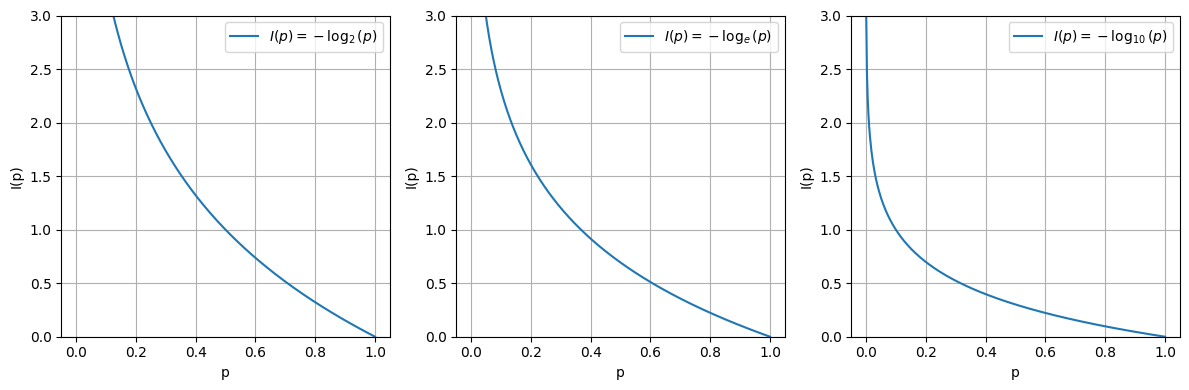

In [489]:
# Generate x values greater than 0 (log is undefined for x ≤ 0)
p = np.linspace(0.001, 1, 400)
log_e = -np.log(p)  # Natural logarithm (base e)
log_2 = -np.log2(p)  # 2
log_10 = -np.log10(p)  # 10


fig, sb = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
sb[0].plot(p, log_2, label=r'$I(p) = - \log_2(p)$')
sb[0].set_xlabel('p')
sb[0].set_ylabel('I(p)')
sb[0].set_ylim([0, 3])
sb[0].legend()
sb[0].grid(True)

sb[1].plot(p, log_e, label=r'$I(p) = - \log_e(p)$')
sb[1].set_xlabel('p')
sb[1].set_ylabel('I(p)')
sb[1].set_ylim([0, 3])
sb[1].legend()
sb[1].grid(True)

sb[2].plot(p, log_10, label=r'$I(p) = - \log_{10}(p)$')
sb[2].set_xlabel('p')
sb[2].set_ylabel('I(p)')
sb[2].set_ylim([0, 3])
sb[2].legend()
sb[2].grid(True)

# Show the plot
plt.tight_layout()
plt.show()

But why does $\I(p)$ change with respect to the base? What does "information content" have to do with which logarhitm we choose?


Turns out, just like I can measure length in meters or feet, the base of the logarithm in our self-information function represents the units in which we measure information.\
Different bases correspond to different measurement systems, most common are:

* Base 2 (log₂): Measures information in **bits** (binary digits), which is useful in digital communication and computing.

* Base e (ln, natural log): Measures information in **nats**, often used in statistical mechanics and probability theory.

* Base 10 (log₁₀): Measures information in **Hartleys**, which is useful in certain engineering applications.


<hr>


### <ins>Reality is two entities communicating uncertain events</ins>

Another way to interpret "information" is as a measure of surprise rather than amount of knowledge. Think about it, just like the examples before, If you read a certain book that you have completely memorized, then the information you gained is zero. However, if you insisted on reading the book and in the middle of it you surprisingly encounter a brand new chapter that you haven't seen before, then suddenly you have gained a lot of new information. 


This hints at a deeper truth within about information: When we view the entire universe as an entity, we cannot possibly know how complete the information communicated to us is. To put it bluntly, because we cannot with a 100% certainty predict the future, there is always new events to be observed and new physics to be discovered. When we talk events in the real world, we have to assume the information given to us by the universe is **random.** Thus we often wanna measure how uncertain we are about the information content

<br>

#### Flipping Coins:
Let's say we made a bet: I flip a coin, and ask you to predict the answer ahead of time. If your prediction is right, I double your investment\
If you predict $Tails$, how certain would you be of your answer? In some sense, placing a bet is akin to saying that you're certain of a particular outcome.  
But we know that the probability of getting $Tails$ is $\frac{1}{2}$... a 50% chance that you're right.

In [490]:
%%HTML
<div id="coin-simulator" style="max-width: 800px; margin: 0 auto; font-family: Arial, sans-serif;">
    <div style="margin: 20px 0;display: inline-flex;flex-direction: row;flex-wrap: wrap;align-content: center;justify-content: space-around;">
    <div id="coins-container" style="display: flex; flex-wrap: wrap; justify-content: center; gap: 15px; margin: 20px 0;">
        <!-- Coins will be generated here -->
    </div>
    
    <div  style="display: flex; justify-content: center; margin: 20px 0;">
        <button class="btn btn-primary"id="flip-button"  style="padding: 10px 20px; font-size: 18px;">Flip Coins</button>
    </div>
        <div style="display: flex; justify-content: center; gap: 50px; text-align: center;">
            <div>
                <p>Heads: <span id="heads-count">0</span></p>
                <p>Probability: <span id="heads-probability">0%</span></p>
            </div>
            <div>
                <p>Tails: <span id="tails-count">0</span></p>
                <p>Probability: <span id="tails-probability">0%</span></p>
            </div>
        </div>
    </div>
    
    <div style="margin: 20px 0;">
        <h3 style="text-align: center;">Sequence History</h3>
        <div style="max-height: 200px; overflow-y: auto; border: 1px solid #ddd; padding: 10px; border-radius: 5px;">
            <table id="history-table" style="width: 100%; border-collapse: collapse;">
                <thead>
                    <tr>
                        <th style="border-bottom: 1px solid #ddd; padding: 8px; text-align: left;">Flip</th>
                        <th style="border-bottom: 1px solid #ddd; padding: 8px; text-align: left;">Result</th>
                        <th style="border-bottom: 1px solid #ddd; padding: 8px; text-align: left;">H/T Distribution</th>
                    </tr>
                </thead>
                <tbody>
                    <!-- History will be added here -->
                </tbody>
            </table>
        </div>
    </div>
</div>

<style>
@keyframes flip {
    0% { transform: rotateY(0deg); }
    100% { transform: rotateY(720deg); }
}

.coin {
    width: 70px;
    height: 70px;
    position: relative;
    margin: 5px;
    transform-style: preserve-3d;
    transition: transform 0.5s ease-out;
}

.coin-inner {
    width: 100%;
    height: 100%;
    position: absolute;
    transform-style: preserve-3d;
}

.coin-face {
    position: absolute;
    width: 100%;
    height: 100%;
    border-radius: 50%;
    backface-visibility: hidden;
    display: flex;
    align-items: center;
    justify-content: center;
    font-weight: bold;
    font-size: 16px;
    box-shadow: 0 4px 8px rgba(0,0,0,0.2);
}

.heads {
    background: linear-gradient(145deg, #869e76, #050d05);
}


.tails {
    background: linear-gradient(145deg, #4e3737, #070704);
    transform: rotateY(180deg);
}

.flipping {
    animation: flip 1s ease-out;
}

.highlight {
    animation: highlight 1s ease-in-out;
}

@keyframes highlight {
    0% { box-shadow: 0 0 5px 2px rgba(255, 215, 0, 0.5); }
    50% { box-shadow: 0 0 15px 5px rgba(255, 215, 0, 0.8); }
    100% { box-shadow: 0 0 5px 2px rgba(255, 215, 0, 0.5); }
}
</style>

Flip,Result,H/T Distribution


In [491]:

%%javascript
// Variables to track statistics
let totalFlips = 0;
let headsCount = 0;
let tailsCount = 0;
let flipResults = [];

// Create 8 coins
const coinsContainer = document.getElementById('coins-container');
const coins = [];

for (let i = 0; i < 8; i++) {
    // Create coin container
    const coin = document.createElement('div');
    coin.className = 'coin';
    coin.dataset.value = 'heads'; // Start with heads up
    
    // Create coin inner container (for 3D effect)
    const coinInner = document.createElement('div');
    coinInner.className = 'coin-inner';
    
    // Create heads face
    const headsFace = document.createElement('div');
    headsFace.className = 'coin-face heads';
    headsFace.textContent = 'H';
    
    // Create tails face
    const tailsFace = document.createElement('div');
    tailsFace.className = 'coin-face tails';
    tailsFace.textContent = 'T';
    
    // Add faces to coin
    coinInner.appendChild(headsFace);
    coinInner.appendChild(tailsFace);
    coin.appendChild(coinInner);
    
    // Make individual coin clickable
    coin.addEventListener('click', () => {
        flipCoin(coin);
    });
    
    // Add to container
    coinsContainer.appendChild(coin);
    coins.push(coin);
}

// Function to flip a single coin
function flipCoin(coin) {
    // Prevent flipping during animation
    if (coin.classList.contains('flipping')) return;
    
    // Add flipping animation
    coin.classList.add('flipping');
    
    // Get random result
    const result = Math.random() < 0.5 ? 'heads' : 'tails';
    
    // Set result after animation completes
    setTimeout(() => {
        coin.classList.remove('flipping');
        coin.dataset.value = result;
        coin.style.transform = result === 'heads' ? 'rotateY(0deg)' : 'rotateY(180deg)';
        
        // Highlight the coin briefly
        coin.classList.add('highlight');
        setTimeout(() => {
            coin.classList.remove('highlight');
        }, 1000);
    }, 900);
}

// Function to flip all coins
function flipAllCoins() {
    // Reset flip results
    const currentFlip = [];
    
    // Flip each coin with slight delay
    coins.forEach((coin, index) => {
        setTimeout(() => {
            // Get random result
            const result = Math.random() < 0.5 ? 'heads' : 'tails';
            currentFlip.push(result);
            
            // Start flipping animation
            coin.classList.add('flipping');
            
            // Set result after animation completes
            setTimeout(() => {
                coin.classList.remove('flipping');
                coin.dataset.value = result;
                coin.style.transform = result === 'heads' ? 'rotateY(0deg)' : 'rotateY(180deg)';
                
                // Update statistics if this is the last coin
                if (index === coins.length - 1) {
                    updateStatistics(currentFlip);
                }
            }, 900);
        }, index * 100); // Stagger the flips
    });
}

// Function to update statistics
function updateStatistics(results) {
    totalFlips++;
    
    // Count heads and tails in current flip
    const currentHeads = results.filter(r => r === 'heads').length;
    const currentTails = results.filter(r => r === 'tails').length;
    
    // Update total counts
    headsCount += currentHeads;
    tailsCount += currentTails;
    
    // Update UI
    document.getElementById('heads-count').textContent = headsCount;
    document.getElementById('tails-count').textContent = tailsCount;
    
    // Calculate and update probabilities
    const totalCoins = headsCount + tailsCount;
    const headsProb = (headsCount / totalCoins * 100).toFixed(1);
    const tailsProb = (tailsCount / totalCoins * 100).toFixed(1);
    
    document.getElementById('heads-probability').textContent = `${headsProb}%`;
    document.getElementById('tails-probability').textContent = `${tailsProb}%`;
    
    // Add to history
    addToHistory(results, currentHeads, currentTails);
}

// Function to add results to history table
function addToHistory(results, heads, tails) {
    const historyTable = document.getElementById('history-table').getElementsByTagName('tbody')[0];
    const newRow = historyTable.insertRow(0);
    
    // Flip number cell
    const flipCell = newRow.insertCell(0);
    flipCell.textContent = totalFlips;
    
    // Results cell
    const resultCell = newRow.insertCell(1);
    resultCell.innerHTML = results.map(r => r === 'heads' ? 
        '<span style="color: var(--accent-alt); font-weight: bold;">H</span>' : 
        '<span style="color: var(--text); font-weight: bold;">T</span>').join(' ');
    
    // Distribution cell
    const distCell = newRow.insertCell(2);
    distCell.innerHTML = `<span style="color: var(--accent-alt); font-weight: bold;">H: ${heads}</span> / <span style="color: var(--text); font-weight: bold;">T: ${tails}</span>`;
    
    // Highlight the new row
    newRow.style.backgroundColor = 'var(--accent-highlight)';
    setTimeout(() => {
        newRow.style.backgroundColor = '';
    }, 1000);
}

// Add event listener to flip button
document.getElementById('flip-button').addEventListener('click', flipAllCoins);

// Initial flip
setTimeout(flipAllCoins, 500);

<IPython.core.display.Javascript object>


Now lets say, before taking your money, I flipped the coin 8 times and showed you the outcomes:

$X = \set{H,H,T,H,T,H,H,H}$


Would you still pick $Tails$? Intuitively, the answer is no: out of the 8 flips we only get 2 that are Tails, suggesting that the coin is heavily *biased* in favor of Heads. \
But why are we so inclined to believe the coin is biased only after 8 flips? After all, its entirely possible that we just got a very lucky set of observations.
This is where measuring information starts making intuitive sense. 

<br>

Let's start with our prior beliefs: since we're betting, we think the coin always comes out $Tails$.
The first observed $Heads$ communicated to us $I(0) = \inf $ information, since us our belief didn't think this outcome was even possible.
So, we split the total probability in two and aassume the coin is fair, giving the two outcomes equal probabilities $P(x_i = Tails) = P(x_i = Heads)  = \frac{1}{2}$. \
Now, we can say that the first observation communicated $\I(\frac{1}{2}) = 1$ bit of information. \
After 8 flips, I would have communicated $8\times\I(\frac{1}{2}) = 8 \times -\log_2 (\frac{1}{2}) = 8  $ bits of information. \

But, in the 8 flips we predominantly observe $Heads$, so let's assume that the 8 flips indicate the true distribution $P(x_i=Tails) = \frac{2}{8}$.
This means that the information conveyed to us is actually $8*\I(p_{tails}) = 8 * -\log(\frac{1}{3}) \approx 8*1.585 = 12.68$ bits for the 8 flips... substantially higher than if the coin was fair, which makes sense since we're surprised that the two outcomes aren't equally likely.

<br>

The following table shows $\I(p)$ for all 8 possible coin flips, where $p$ is the observed probability distribution of getting the most common outcome:

For instance:
$\I(X = "HHTHTHHH") = \I(P(x_{i+1}=Heads)) = -log_2\frac{6}{8}= 0.4$  bits:


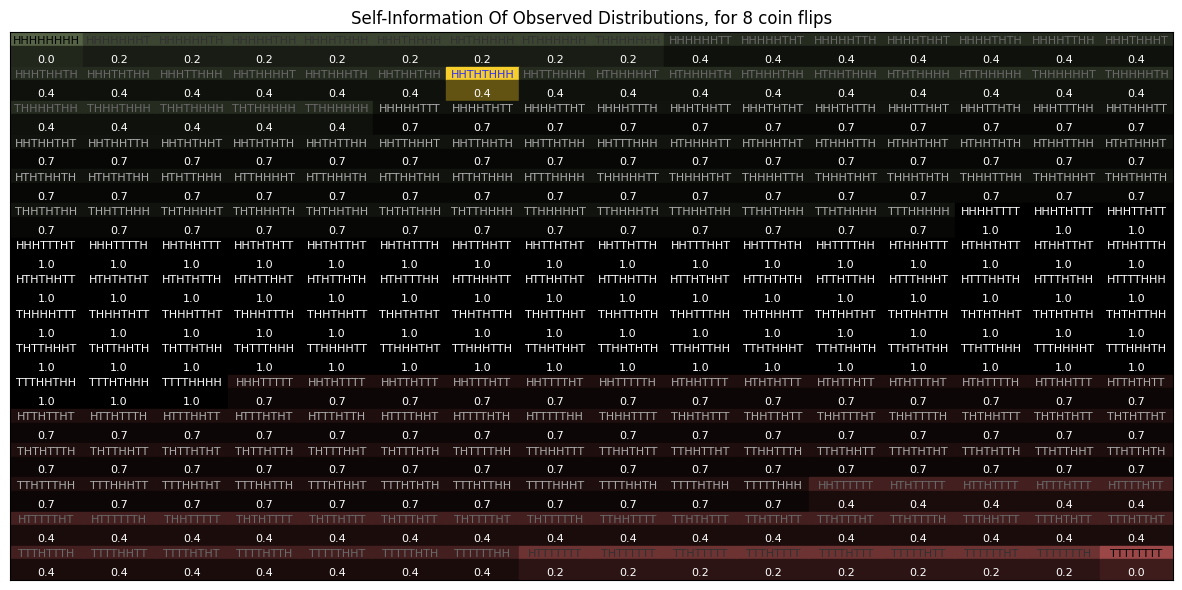

In [492]:
import itertools

N = 8 # Number of flips

sequences = [''.join(seq) for seq in itertools.product('HT', repeat=N)]
sorted_sequences = sorted(sequences, key=lambda x: x.count('T'))

total_seqs = len(sequences)  # 2^N
grid_width = int(np.ceil(np.sqrt(total_seqs)))
grid_height = int(np.ceil(total_seqs / grid_width))


fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, grid_width)
ax.set_ylim(0, grid_height)
ax.set_xticks([])
ax.set_yticks([])

color_start = np.array([155, 71, 71]) / 255
color_end   = np.array([85, 98, 70]) / 255

# Plot boxes with text
for i, seq in enumerate(sorted_sequences):
    x = i % grid_width
    y = grid_height - 1 - (i // grid_width)  
    

    p_t = seq.count('T') / N 
    p_h = seq.count('H') / N 

    color   = np.array([246, 247, 244]) / 255

    I=1
    if p_t > 0.5:
        I = -np.log2(p_t) 
        color = color_start * p_t
    elif p_h > 0.5:
        I = -np.log2(p_h) 
        color = color_end * p_h

    color *= 1-I
    text_color = np.array((.0, .0, .0)) + I* np.array([1,1,1]) 

    if seq=='HHTHTHHH':
        color = np.array([246, 207, 44]) / 255
        text_color = np.array([46, 47, 244]) /255

    ax.add_patch(plt.Rectangle((x, y+.6), 1, .4, fill=True, color=color ))
    ax.add_patch(plt.Rectangle((x, y), 1, .6, fill=True, color=color*.4 ))
    ax.text(x + 0.5, y + 0.75, seq, ha='center', va='center', fontsize=8, color = text_color)
    ax.text(x + 0.5, y + 0.2, f'{abs(I) :.1f}' , ha='center', va='center', fontsize=8, color = 'white')

plt.title(f"Self-Information Of Observed Distributions, for {N} coin flips")
plt.tight_layout()
plt.show()



There are $2^8 = 256$ possible outcomes for the 8 flips.
If we look at the sequence "HHHHHHH", we can see that it has the self-information value of 0 because if we assume that this is the true distribution for the coin,\
i.e $P(x_{i+1}=Heads) = 1$, which is the same as assuming that the coin always flips to $heads$, then, observing another $heads$ for the 9th coin flip would be the least "surprising" outcome. 
In this framing, **the 8 coin flips are telling us at most 1 bit of information: is the coin fair or not?**

<hr>

If we're betting on a flip of a coin, then we want to know if theres a clear pattern to its outcomes based on our previous observations.
If there's an equal amount of $Heads$ and $Tails$, then we don't know what to bet on, but if  all the outcomes are $heads$, then we might want to bet on $heads$.
Another way to frame this is to ask: how disordered is the set of observations? 
In other words, *how surprising is this sequence, if we assume all outcomes are equally likely?*

### Definition Of Disorder
Lets define a measure of "disorder" as a function $H$,

>$H(X) = f(X)$,  for some set $X = \set{x_1, x_2, x_3... x_n}$ and some function $f(*)$ 


We expect $H$ to have the following properties:
<div className="definition-properties">

$H(X) : X \rightarrow [0, 1]$
* **A set of observations, where each outcome is different and unique is completely disordered.**  If we see no discernable pattern to the outcomes, then we say that the set is random and the entropy measures the value of 1.
* **A set of observations with only one type of outcome, is completely ordered** If we only see a clear pattern in the set, then it is ordered and the measure of entropy gives the value of 0.
* **Information is always positive.** If you think about it, The idea of "negative information" makes no sense. You can't unsurprise someone, just like there is no piece of information that I can tell you that will destroy some piece of information that you already hold.
* **Information is continuous**, We would like I’s domain to be continuous in the interval [0,1]. \
That is, a small change in the probability of an event should lead to a corresponding small change in the surprise that we experience. 

$\I(A \cap B) = \I(A) + \I(B)$ 
* **Information is additive**: If $A$ and $B$ are independent events, then the information gained by observing both should just be information of A + information of B
</div>

### Finding $f(*)$:
Start with the definition of independent events:\
$P(A \cap B) = P(A) \times P(B)$   

This means:\
$\I(A \cap B) = f(P(A) \times P(B)) = \I(P(A)) + \I(P(B))$


Analyzing Cauchy's functional equations show us that for:\
$f(x \times y) = f(x) + f(y)$

the only function $f(*)$ that satisfies all of the above properties, is:\
$f(x) = Klog(x)$


The only K that satisfies all of our properties defined above is K=-1


consider an **unfair** coin with a $p_tails = .9$





# Entropy:
>$$ H(p) = \E[\I(p)] = \sum_{x_i \in X} P(x_i) \log P(x_i) $$

Entropy measures the expected (i.e., average) amount of information communicated by the outcomes of a particular set of observations.
It is directly related to the concept of entropy in [Thermo Dynamics](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics))


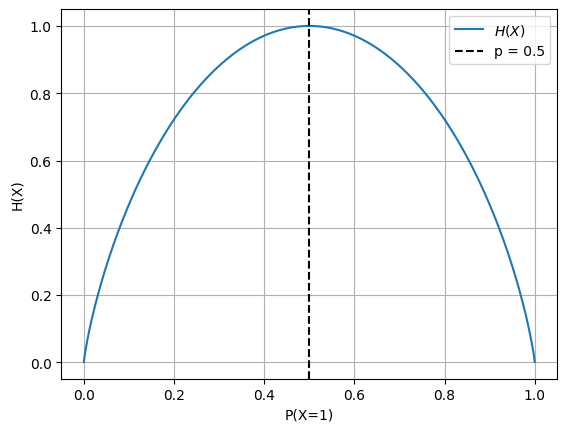

In [493]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values greater than 0 (log is undefined for x ≤ 0)
p = np.linspace(0.0001, .9999, 400)
log_e = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# Create the plot
plt.plot(p, log_e, label=r'$H(X)$')
plt.xlabel('P(X=1)')
plt.ylabel('H(X)')
plt.axvline(0.5, linestyle="dashed", color="black", label="p = 0.5")

plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Rolling Dice

In [494]:
%%HTML
<div id="dice-container" style="display: flex;margin: 20px 0;align-items: center;justify-content: space-evenly;align-content: center;flex-wrap: nowrap;flex-direction: row-reverse;">
    <div style="position: relative; height: 220px; perspective: 1000px;">
        <div style="display: flex; justify-content: center; gap: 30px; perspective: 1000px;">
            <div id="die1-wrapper" class="die-wrapper" style="transform-style: preserve-3d; width: 100px; height: 100px; position: relative;">
                <div id="die1" class="die" style="width: 100px; height: 100px; position: absolute; transform-style: preserve-3d;"></div>
            </div>
            <div id="die2-wrapper" class="die-wrapper" style="transform-style: preserve-3d; width: 100px; height: 100px; position: relative;">  
                <div id="die2" class="die" style="width: 100px; height: 100px; position: absolute; transform-style: preserve-3d;"></div>
            </div>
        </div>
    <div style="text-align: center; margin-top: 20px;">
        <button id="roll-button" class="btn-primary">Roll Dice</button>
    </div>
    </div>
   
    <div style="margin-top: 30px;">
        <table id="outcomes-table" style="margin: 0 auto; border-collapse: collapse;"></table>
    </div>
</div>

<style>
.die-face {
    position: absolute;
    width: 100px;
    height: 100px;
    background-color: var(--accent-dark);
    border: 2px solid var(--accent-light);
    display: flex;
    align-items: center;
    justify-content: center;
    font-size: 24px;
    box-shadow: inset 0 0 15px rgba(0,0,0,0.1);
}

.die-dot {
    background-color: var(--neutral-100);
    border-radius: 50%;
    width: 18px;
    height: 18px;
    position: absolute;
}

@keyframes highlight-pulse {
    0% { background-color: var(--neutral-600); }
    50% { background-color: var(--accent-alt2); }
    100% { background-color: var(--accent-active); }
}

.highlight-flash {
    animation: highlight-pulse 1s ease;
}
.highlighted{
    background-color: var(--accent-active); 
    color: var(--text-alt) !important;
}

.die-wrapper {
    transition: transform 0.1s;
}
</style>

In [497]:
%%javascript
// Create 3D dice
function createDie(dieId) {
    const die = document.getElementById(dieId);

    
    // Create 6 faces
    const faces = [
        { transform: 'rotateY(0deg) translateZ(50px)', dots: [5] },                   // Front - 1
        { transform: 'rotateY(90deg) translateZ(50px)', dots: [1, 9] },               // Right - 2
        { transform: 'rotateY(180deg) translateZ(50px)', dots: [1, 5, 9] },           // Back - 3
        { transform: 'rotateY(270deg) translateZ(50px)', dots: [1, 3, 7, 9] },        // Left - 4
        { transform: 'rotateX(90deg) translateZ(50px)', dots: [1, 3, 5, 7, 9] },      // Top - 5
        { transform: 'rotateX(-90deg) translateZ(50px)', dots: [1, 3, 4, 6, 7, 9] }   // Bottom - 6
    ];
    
    // Positions for dots in a 3x3 grid
    const dotPositions = {
        1: { top: '20%', left: '20%' },
        2: { top: '20%', left: '50%' },
        3: { top: '20%', left: '80%' },
        4: { top: '50%', left: '20%' },
        5: { top: '50%', left: '50%' },
        6: { top: '50%', left: '80%' },
        7: { top: '80%', left: '20%' },
        8: { top: '80%', left: '50%' },
        9: { top: '80%', left: '80%' }
    };
    
    faces.forEach((face, index) => {
        const faceElement = document.createElement('div');
        faceElement.className = 'die-face';
        faceElement.style.transform = face.transform;
        
        // Add dots to face
        face.dots.forEach(position => {
            const dot = document.createElement('div');
            dot.className = 'die-dot';
            dot.style.top = dotPositions[position].top;
            dot.style.left = dotPositions[position].left;
            dot.style.transform = 'translate(-50%, -50%)';
            faceElement.appendChild(dot);
        });
        
        die.appendChild(faceElement);
    });
    
    return die;
}

// Create both dice
const die1 = createDie('die1');
const die2 = createDie('die2');

// Generate the outcomes table in diamond pattern
const table = document.getElementById('outcomes-table');

// Create diamond-shaped table
const values = [];
for (let sum = 2; sum <= 12; sum++) {
    const row = [];
    for (let die1 = 1; die1 <= 6; die1++) {
        for (let die2 = 1; die2 <= 6; die2++) {
            if (die1 + die2 === sum) {
                row.push({ die1, die2 });
            }
        }
    }
    values.push(row);
}

// Calculate the maximum width (7 cells for sum=7)
const maxWidth = Math.max(...values.map(row => row.length));

// Create the table
values.forEach((combinations, index) => {
    const row = document.createElement('tr');
    
    // Calculate padding for centering
    const emptyCellsCount = Math.floor((maxWidth - combinations.length) / 2);
    
    // Add sum label to first cell
    const sumCell = document.createElement('td');
    sumCell.textContent = index + 2; // sum values from 2-12
    sumCell.style.fontWeight = 'bold';
    sumCell.style.padding = '8px';
    sumCell.style.border = '1px solid #ddd';
    row.appendChild(sumCell);
    
    // Add empty cells for padding
    for (let i = 0; i < emptyCellsCount; i++) {
        const emptyCell = document.createElement('td');
        emptyCell.style.border = 'none';
        emptyCell.style.width = '60px';
        row.appendChild(emptyCell);
    }
    
    const facesText = ["⚀", "⚁", "⚂", "⚃", "⚄", "⚅"];
    // Add cells for each combination
    combinations.forEach(combo => {
        const cell = document.createElement('td');
        cell.id = `cell-${combo.die1}-${combo.die2}`;
        cell.style.border = '1px solid #ddd';
        cell.style.padding = '8px';
        cell.style.textAlign = 'center';
        cell.style.width = '20px';
        cell.style.height = '20px';
        
        // Add die values display
        const dieContainer = document.createElement('div');
        dieContainer.style.display = 'flex';
        dieContainer.style.justifyContent = 'center';
        dieContainer.style.alignItems = 'center';
        dieContainer.style.gap = '5px';
        
        const die1Display = document.createElement('div');
        die1Display.textContent = facesText[combo.die1-1];
        die1Display.style.fontSize = '40px';
        die1Display.style.width = '50%';
        die1Display.style.height = '50%';
        die1Display.style.borderRadius = '5px';
        die1Display.style.display = 'flex';
        die1Display.style.alignItems = 'center';
        die1Display.style.justifyContent = 'center';
        
        const die2Display = document.createElement('div');
        die2Display.textContent = facesText[combo.die2-1];
        die2Display.style.fontSize = '40px';
        die2Display.style.width = '50%';
        die2Display.style.height = '50%';
        die2Display.style.borderRadius = '5px';
        die2Display.style.display = 'flex';
        die2Display.style.alignItems = 'center';
        die2Display.style.justifyContent = 'center';
        
        dieContainer.appendChild(die1Display);
        dieContainer.appendChild(die2Display);
        cell.appendChild(dieContainer);
        
        row.appendChild(cell);
    });
    
    table.appendChild(row);
});

// Function to get 3D rotation for a specific die face (1-6)
function getDieFaceRotation(faceValue) {
    switch(faceValue) {
        case 1: return 'rotateY(0deg)';        // Front face showing 1
        case 2: return 'rotateY(-90deg)';      // Right face showing 2
        case 3: return 'rotateY(180deg)';      // Back face showing 3
        case 4: return 'rotateY(90deg)';       // Left face showing 4
        case 5: return 'rotateX(-90deg)';      // Top face showing 5
        case 6: return 'rotateX(90deg)';       // Bottom face showing 6
    }
}

// Roll dice function with 3D animation
function rollDice() {
    // Disable button during animation
    const rollButton = document.getElementById('roll-button');
    rollButton.disabled = true;
    rollButton.style.opacity = '0.5';
    
    // Reset previously highlighted cell
    const previousHighlight = document.querySelector('.highlighted');
    if (previousHighlight) {
        previousHighlight.classList.remove('highlighted');
        previousHighlight.style.backgroundColor = '';
        previousHighlight.style.fontWeight = '';
    }
    
    const die1Wrapper = document.getElementById('die1-wrapper');
    const die2Wrapper = document.getElementById('die2-wrapper');
    
    // Generate random numbers for dice
    const die1Value = Math.floor(Math.random() * 6) + 1;
    const die2Value = Math.floor(Math.random() * 6) + 1;
    
    // Animation duration
    const duration = 1500; // ms
    const frameDuration = 16; // ms
    const steps = Math.floor(duration / frameDuration);
    
    let step = 0;
    
    // Animate dice rolling
    const animateInterval = setInterval(() => {
        step++;
        
        if (step < steps) {
            // Random rotation during animation
            die1Wrapper.style.transform = `translateY(${Math.sin(step/10) * 40}px) rotateX(${step * 30 % 360}deg) rotateY(${step * 25 % 360}deg) rotateZ(${step * 20 % 360}deg)`;
            die2Wrapper.style.transform = `translateY(${Math.sin((step+5)/10) * 40}px) rotateX(${step * 35 % 360}deg) rotateY(${step * 20 % 360}deg) rotateZ(${step * 30 % 360}deg)`;
        } else {
            // Set final position
            clearInterval(animateInterval);
            
            die1Wrapper.style.transform = `translateY(0) ${getDieFaceRotation(die1Value)}`;
            die2Wrapper.style.transform = `translateY(0) ${getDieFaceRotation(die2Value)}`;
            
            
            // Highlight the corresponding cell
            const cell = document.getElementById(`cell-${die1Value}-${die2Value}`);
            cell.classList.add('highlighted');
            cell.classList.add('highlight-flash');
            
            // Re-enable button
            setTimeout(() => {
                rollButton.disabled = false;
                rollButton.style.opacity = '1';
            }, 500);
        }
    }, frameDuration);
}

// Add event listener to roll button
document.getElementById('roll-button').addEventListener('click', rollDice);

// Initial roll
setTimeout(rollDice, 500);

<IPython.core.display.Javascript object>

This highlights a fundamental principle: information exists as a potential, but knowledge requires communication. Without an observer, the event still happens, but it does not become known. This reinforces the idea that reality consists of events communicated between entities—and without a receiver, the information does not transition into knowledge.
Entropy, in some sense, is the measure of potential information we think we will recieve by further observing a system.

<hr>

Let's now extend to an event with more than two examples:







# Encoding

The Source Coding Theorem leads us to interpret the base of the logarithm used in the definition of I
 as the number of symbols in the alphabet that Person A is using to construct their messages. Said differently, the base of the logarithm in the definition for I
 can be understood as the size of a hypothetical alphabet that we are using to communicate the result of a surprising event.

# <ins>Conclusion:</ins>
Information theory provides a mathematical framework for understanding knowledge as a quantifiable transfer between entities. It suggests that reality itself might be conceived as a network of information exchanges between entities, with knowledge emerging from these exchanges.
When we ask whether a falling tree makes a sound when no one is around to hear it, we're really asking about the nature of information itself—whether it exists independently of being received and interpreted. The mathematical formalism of information theory suggests that while the physical basis for information may exist independently, information as a meaningful concept requires both transmission and reception.